In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [3]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

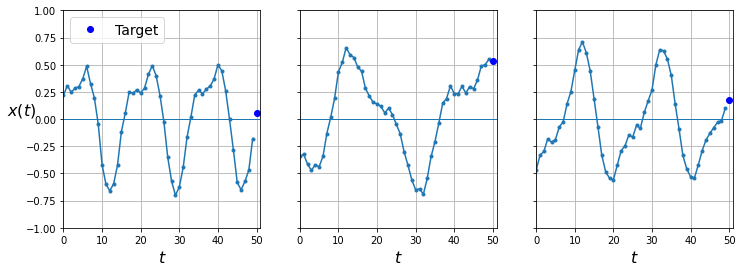

In [4]:
import matplotlib.pyplot as plt

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

In [5]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.019869486

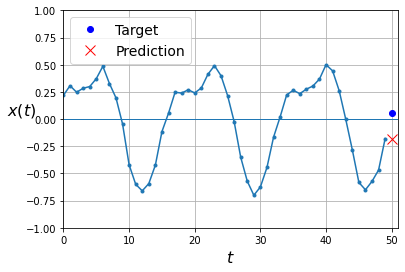

In [6]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(50, 1)),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model.evaluate(X_valid, y_valid)

Epoch 1/10
219/219 [==============================] - 2s 4ms/step - loss: 0.1335 - val_loss: 0.0391
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0292 - val_loss: 0.0232
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0186 - val_loss: 0.0156
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0135 - val_loss: 0.0117
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0109 - val_loss: 0.0097
Epoch 6/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0094 - val_loss: 0.0084
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 8/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0075 - val_loss: 0.0067
Epoch 9/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0068 - val_loss: 0.0061
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0056


0.005583053454756737

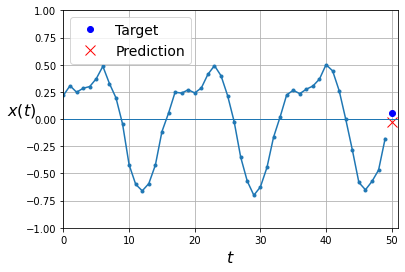

In [8]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [9]:
keras.backend.clear_session()

model = keras.models.Sequential([ 
    keras.layers.SimpleRNN(1, input_shape=(None, 1))
])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.005))
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 20s 87ms/step - loss: 0.0251 - val_loss: 0.0114
Epoch 2/10
219/219 [==============================] - 20s 91ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 3/10
219/219 [==============================] - 20s 89ms/step - loss: 0.0113 - val_loss: 0.0107
Epoch 4/10
219/219 [==============================] - 19s 86ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 5/10
219/219 [==============================] - 19s 88ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 6/10
219/219 [==============================] - 19s 88ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 7/10
219/219 [==============================] - 19s 88ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 8/10
219/219 [==============================] - 19s 88ms/step - loss: 0.0112 - val_loss: 0.0108
Epoch 9/10
219/219 [==============================] - 19s 87ms/step - loss: 0.0113 - val_loss: 0.0107
Epoch 10/10
219/219 [==============================] - 19s 88ms/step - loss: 0.011

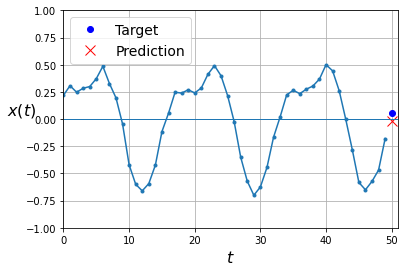

In [10]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [11]:
model = keras.models.Sequential([ 
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=(None, 1)),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 69s 309ms/step - loss: 0.0258 - val_loss: 0.0055
Epoch 2/10
219/219 [==============================] - 70s 320ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 3/10
219/219 [==============================] - 69s 316ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 4/10
219/219 [==============================] - 69s 314ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 5/10
219/219 [==============================] - 70s 319ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 6/10
219/219 [==============================] - 70s 322ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 7/10
219/219 [==============================] - 71s 323ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 8/10
219/219 [==============================] - 71s 324ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 9/10
219/219 [==============================] - 70s 321ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 10/10
219/219 [==============================] - 70s 321ms/step - l

In [12]:
model = keras.models.Sequential([ 
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=(None, 1)),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 45s 202ms/step - loss: 0.0097 - val_loss: 0.0040
Epoch 2/10
219/219 [==============================] - 44s 201ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 3/10
219/219 [==============================] - 44s 202ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 4/10
219/219 [==============================] - 44s 201ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 5/10
219/219 [==============================] - 44s 201ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 6/10
219/219 [==============================] - 45s 203ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 7/10
219/219 [==============================] - 43s 196ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 8/10
219/219 [==============================] - 45s 205ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 9/10
219/219 [==============================] - 45s 206ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 10/10
219/219 [==============================] - 44s 202ms/step - l

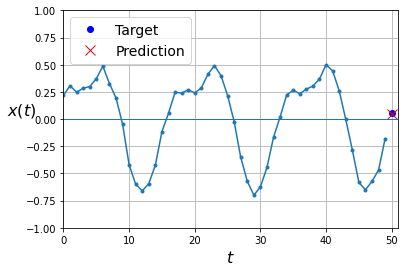

In [13]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [14]:
series = generate_time_series(1, n_steps+10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

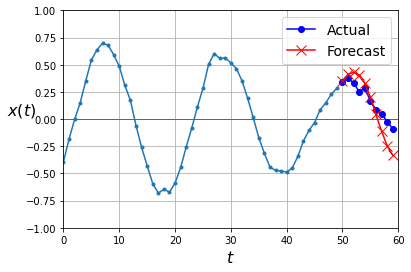

In [15]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [26]:
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [27]:
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:, 0]

In [28]:
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_pred))

0.030976642

In [29]:
Y_naive_pred = np.tile(X_valid[:, -1], 10)
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_naive_pred))

0.26313952

In [31]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid, Y_valid))

Epoch 1/5
219/219 [==============================] - 43s 193ms/step - loss: 0.0709 - val_loss: 0.0361
Epoch 2/5
219/219 [==============================] - 41s 186ms/step - loss: 0.0282 - val_loss: 0.0220
Epoch 3/5
219/219 [==============================] - 42s 190ms/step - loss: 0.0181 - val_loss: 0.0154
Epoch 4/5
219/219 [==============================] - 42s 191ms/step - loss: 0.0157 - val_loss: 0.0157
Epoch 5/5
219/219 [==============================] - 41s 189ms/step - loss: 0.0139 - val_loss: 0.0158


In [32]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

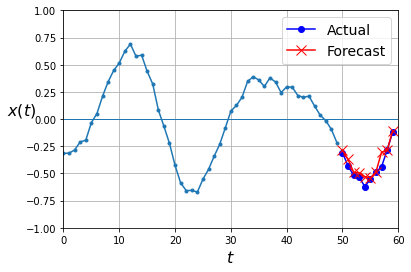

In [33]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [34]:
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [36]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid, Y_valid))

Epoch 1/5
219/219 [==============================] - 43s 191ms/step - loss: 0.0498 - last_time_step_mse: 0.0395 - val_loss: 0.0392 - val_last_time_step_mse: 0.0272
Epoch 2/5
219/219 [==============================] - 43s 196ms/step - loss: 0.0366 - last_time_step_mse: 0.0246 - val_loss: 0.0322 - val_last_time_step_mse: 0.0198
Epoch 3/5
219/219 [==============================] - 41s 187ms/step - loss: 0.0318 - last_time_step_mse: 0.0198 - val_loss: 0.0331 - val_last_time_step_mse: 0.0214
Epoch 4/5
219/219 [==============================] - 42s 190ms/step - loss: 0.0293 - last_time_step_mse: 0.0175 - val_loss: 0.0288 - val_last_time_step_mse: 0.0167
Epoch 5/5
219/219 [==============================] - 43s 195ms/step - loss: 0.0259 - last_time_step_mse: 0.0138 - val_loss: 0.0266 - val_last_time_step_mse: 0.0156


In [37]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

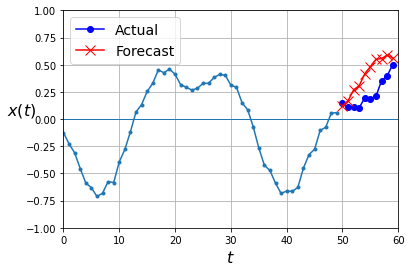

In [38]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [40]:
model = keras.models.Sequential([ 
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.BatchNormalization(),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid, Y_valid))

Epoch 1/5
219/219 [==============================] - 45s 200ms/step - loss: 0.1704 - last_time_step_mse: 0.1556 - val_loss: 0.0686 - val_last_time_step_mse: 0.0574
Epoch 2/5
219/219 [==============================] - 43s 198ms/step - loss: 0.0544 - last_time_step_mse: 0.0433 - val_loss: 0.0538 - val_last_time_step_mse: 0.0429
Epoch 3/5
219/219 [==============================] - 42s 192ms/step - loss: 0.0485 - last_time_step_mse: 0.0385 - val_loss: 0.0477 - val_last_time_step_mse: 0.0372
Epoch 4/5
219/219 [==============================] - 41s 188ms/step - loss: 0.0454 - last_time_step_mse: 0.0358 - val_loss: 0.0456 - val_last_time_step_mse: 0.0366
Epoch 5/5
219/219 [==============================] - 41s 189ms/step - loss: 0.0435 - last_time_step_mse: 0.0342 - val_loss: 0.0434 - val_last_time_step_mse: 0.0343


In [42]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units, activation=None)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)
    
    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if inputs is not None:
            batch_size = tf.shape(input)[0]
            dtype = inputs.dtype
        return [tf.zeros([batch_size, self.state_size], dtype=dtype)]

    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

In [43]:
model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True, input_shape=[None, 1]),
    keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=5, validation_data=(X_valid, Y_valid))

Epoch 1/5
219/219 [==============================] - 104s 456ms/step - loss: 0.1218 - last_time_step_mse: 0.1041 - val_loss: 0.0688 - val_last_time_step_mse: 0.0552
Epoch 2/5
219/219 [==============================] - 98s 448ms/step - loss: 0.0613 - last_time_step_mse: 0.0490 - val_loss: 0.0572 - val_last_time_step_mse: 0.0437
Epoch 3/5
219/219 [==============================] - 97s 443ms/step - loss: 0.0533 - last_time_step_mse: 0.0407 - val_loss: 0.0507 - val_last_time_step_mse: 0.0367
Epoch 4/5
219/219 [==============================] - 96s 440ms/step - loss: 0.0478 - last_time_step_mse: 0.0339 - val_loss: 0.0462 - val_last_time_step_mse: 0.0320
Epoch 5/5
219/219 [==============================] - 99s 453ms/step - loss: 0.0437 - last_time_step_mse: 0.0291 - val_loss: 0.0427 - val_last_time_step_mse: 0.0271


In [ ]:
class MyRNN(keras.layers.Layer):
    def __init__(self, cell, return_sequences=False, **kwargs):
        super().__init__(**kwargs)
        self.cell = cell
        self.return_sequences = return_sequences
        self.get_initial_state = getattr(self.cell, "get_initial_state", self.fallback_initial_state)

    def fallback_initial_state(self, inputs):
        batch_size = tf.shape(inputs)[0]
        return [tf.zeros([batch_size, self.cell.state_size], dtype=inputs.dtype)]
    
    @tf.function
    def call(self, inputs):
        states = 